In [0]:
# Install Kaggle library
!pip install -q kaggle

import os
os.environ['KAGGLE_USERNAME'] = "katetuzina" # username from the json file
os.environ['KAGGLE_KEY'] = "7578fa8dde4c34ef17a35fab34c9b088" # key from the json file
#!kaggle datasets download -d iarunava/happy-house-dataset # api copied from kaggle
!kaggle competitions download -c dogs-vs-cats

 96% 261M/271M [00:06<00:00, 39.5MB/s]
100% 271M/271M [00:06<00:00, 45.6MB/s]
 99% 537M/543M [00:14<00:00, 50.2MB/s]
100% 543M/543M [00:14<00:00, 40.5MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 92.0MB/s]


In [0]:
!unzip train.zip
!unzip test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: test1/5520.jpg          

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
import tensorflow_datasets as tfds

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

main_dir = ""
train_dir = "train"
path = os.path.join(main_dir,train_dir)
print(path)

train


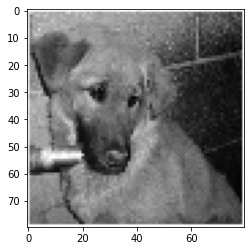

In [0]:
for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [0]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

#Normalize data
X = X/255.0

from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.1)
X, X_val, y, y_val = train_test_split(X, y, test_size=0.1)





In [0]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True, validation_split=0.1)
datagen.fit(X)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(
    X,y, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.1,
    callbacks=[
      tf.keras.callbacks.EarlyStopping(
        patience=10,
        restore_best_weights=True
      )
    ]
)


Epoch 1/100
570/570 [==============================] - 6s 10ms/step - loss: 0.6658 - accuracy: 0.5903 - val_loss: 0.6032 - val_accuracy: 0.6681
Epoch 2/100
570/570 [==============================] - 5s 9ms/step - loss: 0.5633 - accuracy: 0.7094 - val_loss: 0.5210 - val_accuracy: 0.7368
Epoch 3/100
570/570 [==============================] - 5s 9ms/step - loss: 0.4942 - accuracy: 0.7598 - val_loss: 0.4681 - val_accuracy: 0.7886
Epoch 4/100
570/570 [==============================] - 5s 9ms/step - loss: 0.4504 - accuracy: 0.7894 - val_loss: 0.4057 - val_accuracy: 0.8183
Epoch 5/100
570/570 [==============================] - 5s 9ms/step - loss: 0.4099 - accuracy: 0.8105 - val_loss: 0.3844 - val_accuracy: 0.8267
Epoch 6/100
570/570 [==============================] - 5s 9ms/step - loss: 0.3765 - accuracy: 0.8284 - val_loss: 0.3657 - val_accuracy: 0.8341
Epoch 7/100
570/570 [==============================] - 5s 9ms/step - loss: 0.3426 - accuracy: 0.8495 - val_loss: 0.3625 - val_accuracy: 0.837

In [0]:
_, acc = model.evaluate(X_test, y_test)
print(f'Accuracy = {acc:.5f}')

79/79 [==============================] - 0s 5ms/step - loss: 0.3529 - accuracy: 0.8500
Accuracy = 0.85000


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit_generator(
    datagen.flow(X, y, batch_size=32),
    steps_per_epoch=len(X) / 32, 
    epochs=100, 
    callbacks=[
      tf.keras.callbacks.EarlyStopping(
        patience=2,
        restore_best_weights=True,
        monitor='accuracy'
      )
    ])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
633/632 [==============================] - 15s 24ms/step - loss: 0.6754 - accuracy: 0.5930
Epoch 2/100
633/632 [==============================] - 15s 24ms/step - loss: 0.6055 - accuracy: 0.6704
Epoch 3/100
633/632 [==============================] - 15s 24ms/step - loss: 0.5666 - accuracy: 0.7057
Epoch 4/100
633/632 [==============================] - 15s 24ms/step - loss: 0.5300 - accuracy: 0.7359
Epoch 5/100
633/632 [==============================] - 15s 24ms/step - loss: 0.5038 - accuracy: 0.7565
Epoch 6/100
633/632 [==============================] - 15s 24ms/step - loss: 0.4821 - accuracy: 0.7713
Epoch 7/100
633/632 [==============================] - 15s 24ms/step - loss: 0.4641 - accuracy: 0.7813
Epoch 8/100
633/632 [==============================] - 15s 24ms/step - loss: 0.4477 - accuracy: 0.7919
Epoch 9/100
633/632 [==============================] - 15s 24ms/step - loss: 0.4327 - accuracy: 0.80

In [0]:
_, acc = model.evaluate(X_test, y_test)
print(f'Accuracy = {acc:.5f}')

79/79 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.5640
Accuracy = 0.56400


In [0]:
from keras.applications import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

base_model=MobileNet(weights='imagenet',include_top=False) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x)
preds=Dense(2,activation='softmax')(x) 
model=Model(inputs=base_model.input,outputs=preds)
model.summary()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 3s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
____________________________________________________________

In [0]:
import numpy as np
def transform(dataset):
  newDataset = list()
  for x in dataset:
    x = np.repeat(x, 3, 2)
    newDataset.append(x)
  return np.array(newDataset)

newTrainX = transform(X)

print(newTrainX.shape)

(20250, 80, 80, 3)


In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(newTrainX, y, validation_split=0.1, epochs=100, callbacks=[
      tf.keras.callbacks.EarlyStopping(
        patience=2,
        restore_best_weights=True,
        monitor='accuracy'
      )
    ]
)

Train on 18225 samples, validate on 2025 samples
Epoch 1/100
18225/18225 [==============================] - 42s 2ms/step - loss: 0.3331 - accuracy: 0.8641 - val_loss: 0.2887 - val_accuracy: 0.8731
Epoch 2/100
18225/18225 [==============================] - 35s 2ms/step - loss: 0.1991 - accuracy: 0.9205 - val_loss: 0.1945 - val_accuracy: 0.9249
Epoch 3/100
18225/18225 [==============================] - 35s 2ms/step - loss: 0.1564 - accuracy: 0.9397 - val_loss: 0.2199 - val_accuracy: 0.9151
Epoch 4/100
18225/18225 [==============================] - 35s 2ms/step - loss: 0.1257 - accuracy: 0.9512 - val_loss: 0.1997 - val_accuracy: 0.9170
Epoch 5/100
18225/18225 [==============================] - 35s 2ms/step - loss: 0.1013 - accuracy: 0.9615 - val_loss: 0.1870 - val_accuracy: 0.9156
Epoch 6/100
18225/18225 [==============================] - 35s 2ms/step - loss: 0.0967 - accuracy: 0.9652 - val_loss: 0.1899 - val_accuracy: 0.9319
Epoch 7/100
18225/18225 [==============================] - 35s 

In [0]:
newTestX = transform(X_test)
_, acc = model.evaluate(newTestX, y_test)
print(f'Accuracy = {acc:.5f}')

2500/2500 [==============================] - 1s 491us/step
Accuracy = 0.92040
